In [71]:
import pandas as pd
import sklearn.model_selection
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes.csv')

# Separate independent and dependent vairable
x = data.drop('Outcome',axis=1)
y = data['Outcome']

# split dataset
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,random_state=0)


# Impute missing data by mean

In [72]:
# impute missing data (mean)

# train
mean_imp = SimpleImputer(missing_values=0, strategy='mean')

X_train['Glucose'] = mean_imp.fit_transform(X_train['Glucose'].values.reshape(-1,1))
X_train['BloodPressure'] = mean_imp.fit_transform(X_train['BloodPressure'].values.reshape(-1,1))
X_train['SkinThickness'] = mean_imp.fit_transform(X_train['SkinThickness'].values.reshape(-1,1))
X_train['Insulin'] = mean_imp.fit_transform(X_train['Insulin'].values.reshape(-1,1))
X_train['BMI'] = mean_imp.fit_transform(X_train['BMI'].values.reshape(-1,1))

# validate

X_test['Glucose'] = mean_imp.fit_transform(X_test['Glucose'].values.reshape(-1,1))
X_test['BloodPressure'] = mean_imp.fit_transform(X_test['BloodPressure'].values.reshape(-1,1))
X_test['SkinThickness'] = mean_imp.fit_transform(X_test['SkinThickness'].values.reshape(-1,1))
X_test['Insulin'] = mean_imp.fit_transform(X_test['Insulin'].values.reshape(-1,1))
X_test['BMI'] = mean_imp.fit_transform(X_test['BMI'].values.reshape(-1,1))

/var/folders/1m/cryjf7b56hj14d537cgrgjhw0000gn/T/ipykernel_14774/3164201781.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Glucose'] = mean_imp.fit_transform(X_train['Glucose'].values.reshape(-1,1))
/var/folders/1m/cryjf7b56hj14d537cgrgjhw0000gn/T/ipykernel_14774/3164201781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['BloodPressure'] = mean_imp.fit_transform(X_train['BloodPressure'].values.reshape(-1,1))
/var/folders/1m/cryjf7b56hj14d537cgrgjhw0000gn/T/ipykernel_14774/316420178

# Decision Tree

In [178]:
# Tree
trees = DecisionTreeClassifier()
#trees = DecisionTreeClassifier(max_depth=6,min_samples_split=15,min_samples_leaf=4) # improved
trees.fit(X_train,y_train)
y_predict = trees.predict(X_test)


Decision Tree
Confusion Matrix: 
[[117  13]
 [ 31  31]]
Matthews correlation coeff: 0.4450105594639278
Accuracy: 0.7708333333333334
Precision: 0.9
Misclassification: 0.22916666666666666
Specificity: 0.7045454545454546
Sensitivity: 0.7905405405405406


# Logistic Regression

In [74]:
LogisticR = sklearn.linear_model.LogisticRegressionCV(cv = 5,random_state = 0)
LogisticR.fit(X_train,y_train)
y_predicted_LR = LogisticR.predict(X_test)

/Users/negomiaoz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/negomiaoz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

# Visualization

In [ ]:
# tree visualization
from sklearn import tree
fig = plt.figure(figsize=(100,100))
tree.plot_tree(trees, filled=True)
plt.savefig('tree.png')

In [180]:
# Decision Tree Analysis

from sklearn.metrics import confusion_matrix, matthews_corrcoef
c_m = confusion_matrix(y_test, y_predict)
c_m_LR = confusion_matrix(y_test, y_predicted_LR)
print('Decision Tree\n===============')
print(f'Confusion Matrix: \n{c_m}')
print(f'Matthews correlation coeff: {matthews_corrcoef(y_test, y_predict)}')

TP = c_m[0,0]
FP = c_m[0,1]
FN = c_m[1,0]
TN = c_m[1,1]
print(f'Accuracy: {(TP + TN) / (TP + TN + FP + FN)}')
print(f'Precision: {TP / (TP + FP)}')
print(f'Misclassification: {(FP + FN) / (TP + TN + FP + FN)}')
print(f'Specificity: {TN / (TN + FP)}')
print(f'Sensitivity: {TP / (TP + FN)}')


Decision Tree
Confusion Matrix: 
[[117  13]
 [ 31  31]]
Matthews correlation coeff: 0.4450105594639278
Accuracy: 0.7708333333333334
Precision: 0.9
Misclassification: 0.22916666666666666
Specificity: 0.7045454545454546
Sensitivity: 0.7905405405405406


In [108]:
# Logistic Regression analysis

print('\nLogistic Regression\n===============')
print(f'Confusion Matrix: \n{c_m_LR}')
print(f'Matthews correlation coeff: {matthews_corrcoef(y_test, y_predicted_LR)}')
TP1 = c_m_LR[0,0]
FP1 = c_m_LR[0,1]
FN1 = c_m_LR[1,0]
TN1 = c_m_LR[1,1]
print(f'Accuracy: {(TP1 + TN1) / (TP1 + TN1 + FP1 + FN1)}')
print(f'Precision: {TP1 / (TP1 + FP1)}')
print(f'Misclassification: {(FP1 + FN1) / (TP1 + TN1 + FP1 + FN1)}')
print(f'Specificity: {TN1 / (TN1 + FP1)}')
print(f'Sensitivity: {TP1 / (TP1 + FN1)}')



Logistic Regression
Confusion Matrix: 
[[117  13]
 [ 28  34]]
Matthews correlation coeff: 0.4876269468427183
Accuracy: 0.7864583333333334
Precision: 0.9
Misclassification: 0.21354166666666666
Specificity: 0.723404255319149
Sensitivity: 0.8068965517241379


# ROC Curve

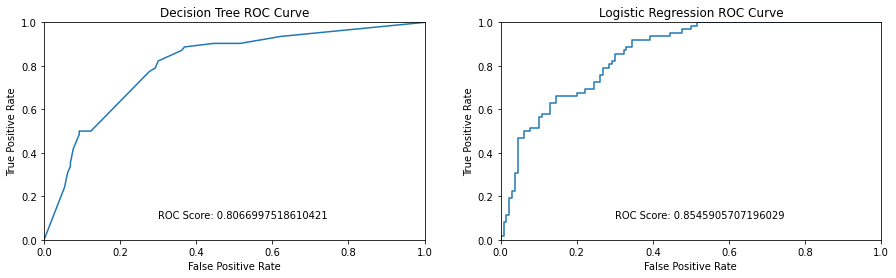

In [179]:
from sklearn import metrics

fig, ax = plt.subplots(ncols = 2, figsize=(15,4))

# Decision Tree
dt_prob = trees.predict_proba(X_test)[:,1]
#print(f'DT ROC Score: {metrics.roc_auc_score(y_test,dt_prob)}')
fpr, tpr, threshold = metrics.roc_curve(y_test, dt_prob)
ax[0].plot(fpr,tpr)
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,1])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Decision Tree ROC Curve')
ax[0].text(0.3,0.1,f'ROC Score: {metrics.roc_auc_score(y_test,dt_prob)}') 

# Logistic Regression
lr_prob = LogisticR.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_prob)
ax[1].plot(fpr,tpr)
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,1])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Logistic Regression ROC Curve')
ax[1].text(0.3,0.1,f'ROC Score: {metrics.roc_auc_score(y_test,lr_prob)}') 

plt.show()


